#**WQU Capstone**
**Group Number: 5468**


*   Track 1: Commodities - Research
*   Topic 1: Energy Products Relationships in Different Markets
*   Title: Understanding and Analyzing Energy Product Price Relationships Across Global Markets


In [5]:
pip install arch

DEPRECATION: jupyter-server 2.0.0 has a non-standard dependency specifier jupyter-core!=~5.0,>=4.12. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of jupyter-server or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install keras.models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.2/132.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.6/872.6 kB 4.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB

In [1]:
pip install keras.layers

ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from statsmodels.tsa.vector_ar.var_model import VAR
from keras.models import Sequential
from keras.layers import LSTM, Dense
import warnings

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'tensorflow'

#**STEP 1: Data Collection**

In [ ]:
def collect_data():
    # Load data from CSV files
    BFOE = 'https://raw.githubusercontent.com/shivanivermapro/WQU-Capstone-Project/main/BFOE.csv?token=GHSAT0AAAAAACRJ326QD7DUOPOWLAPY2A5EZRGP2TQ'
    Bonny_Light = 'https://raw.githubusercontent.com/shivanivermapro/WQU-Capstone-Project/main/Bonny_Light.csv?token=GHSAT0AAAAAACRJ326QMHRKWABVNAUN4Z24ZRGP4JA'
    Europe_Brent = 'https://raw.githubusercontent.com/shivanivermapro/WQU-Capstone-Project/main/Europe_Brent.csv?token=GHSAT0AAAAAACRJ326RYZSDV4PZMXOZPUCUZRGP6FQ'
    WTI = 'https://raw.githubusercontent.com/shivanivermapro/WQU-Capstone-Project/main/WTI.csv?token=GHSAT0AAAAAACRJ326QMOYY4U6TIV5QWBXOZRGP74Q'
    Conventional_Gasoline = 'https://raw.githubusercontent.com/shivanivermapro/WQU-Capstone-Project/main/Conventional_Gasoline.csv?token=GHSAT0AAAAAACRJ326QGCZTJK7GEZOQWLF4ZRGQARQ'
    Diesel_Fuel = 'https://raw.githubusercontent.com/shivanivermapro/WQU-Capstone-Project/main/Diesel_Fuel.csv?token=GHSAT0AAAAAACRJ326QBCYG26A35TOPUYKIZRGQBNA'
    Heating_Oil = 'https://raw.githubusercontent.com/shivanivermapro/WQU-Capstone-Project/main/Heating_Oil.csv?token=GHSAT0AAAAAACRJ326RXVM5ZGVAI4H7DR26ZRGQCSA'
    Propane = 'https://raw.githubusercontent.com/shivanivermapro/WQU-Capstone-Project/main/Propane.csv?token=GHSAT0AAAAAACRJ326RRP2E7SP4W77EKHKWZRGQDKQ'
    Regular_Gasoline = 'https://raw.githubusercontent.com/shivanivermapro/WQU-Capstone-Project/main/Regular_Gasoline.csv?token=GHSAT0AAAAAACRJ326RQBEAYV2VE3OATFBGZRGQD7Q'

    # Read data into DataFrames
    BFOE_df = pd.read_csv(BFOE, index_col=0, parse_dates=[0])
    Bonny_Light_df = pd.read_csv(Bonny_Light, index_col=0, parse_dates=[0])
    Europe_Brent_df = pd.read_csv(Europe_Brent, skiprows=4, index_col=0, parse_dates=[0])
    WTI_df = pd.read_csv(WTI, skiprows=4, index_col=0, parse_dates=[0])
    Conventional_Gasoline_df = pd.read_csv(Conventional_Gasoline, index_col=0, parse_dates=[0])
    Diesel_Fuel_df = pd.read_csv(Diesel_Fuel, index_col=0, parse_dates=[0])
    Heating_Oil_df = pd.read_csv(Heating_Oil, index_col=0, parse_dates=[0])
    Propane_df = pd.read_csv(Propane, index_col=0, parse_dates=[0])
    Regular_Gasoline_df = pd.read_csv(Regular_Gasoline, index_col=0, parse_dates=[0])

    # Filter data based on a consistent date range
    date_range = slice('2010-01-01', '2024-12-31')
    BFOE_df = BFOE_df.loc[date_range]
    Bonny_Light_df = Bonny_Light_df.loc[date_range]
    Europe_Brent_df = Europe_Brent_df.loc[date_range]
    WTI_df = WTI_df.loc[date_range]
    Conventional_Gasoline_df = Conventional_Gasoline_df.loc[date_range]
    Diesel_Fuel_df = Diesel_Fuel_df.loc[date_range]
    Heating_Oil_df = Heating_Oil_df.loc[date_range]
    Propane_df = Propane_df.loc[date_range]
    Regular_Gasoline_df = Regular_Gasoline_df.loc[date_range]

    return BFOE_df, Bonny_Light_df, Europe_Brent_df, WTI_df, Conventional_Gasoline_df, Diesel_Fuel_df, Heating_Oil_df, Propane_df, Regular_Gasoline_df

# Collect data
BFOE_df, Bonny_Light_df, Europe_Brent_df, WTI_df, Conventional_Gasoline_df, Diesel_Fuel_df, Heating_Oil_df, Propane_df, Regular_Gasoline_df = collect_data()

#**STEP 2: Data Preprocessing**

In [ ]:
def preprocess_data(df, zero_handling=[], negative_handling=[], blank_handling='ffill', outlier_threshold=3):
    df.fillna(method=blank_handling, inplace=True)

    for column in zero_handling:
        df[column].replace(0, np.nan, inplace=True)
        df[column].fillna(method=blank_handling, inplace=True)

    for column in negative_handling:
        df[column].clip(lower=0, inplace=True)

    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()
        outliers = (df[column] - mean).abs() > outlier_threshold * std
        df.loc[outliers, column] = np.nan
        df[column].fillna(method=blank_handling, inplace=True)

    return df

# Preprocess data
BFOE_df = preprocess_data(BFOE_df, zero_handling=['Bloomberg European Dated Brent Forties Oseberg Ekofisk (BFOE) Crude Oil Spot Price'])
Bonny_Light_df = preprocess_data(Bonny_Light_df, zero_handling=['Crude Oil Price in USD'])
Europe_Brent_df = preprocess_data(Europe_Brent_df, zero_handling=['Europe Brent Spot Price FOB Dollars per Barrel'])
WTI_df = preprocess_data(WTI_df, zero_handling=['Cushing OK WTI Spot Price FOB Dollars per Barrel'])
Conventional_Gasoline_df = preprocess_data(Conventional_Gasoline_df, zero_handling=['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'])
Diesel_Fuel_df = preprocess_data(Diesel_Fuel_df, zero_handling=['New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)'])
Heating_Oil_df = preprocess_data(Heating_Oil_df, zero_handling=['New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)'])
Propane_df = preprocess_data(Propane_df, zero_handling=['Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)'])
Regular_Gasoline_df = preprocess_data(Regular_Gasoline_df, zero_handling=['Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)'])



#**STEP 3: Time Series Analysis**

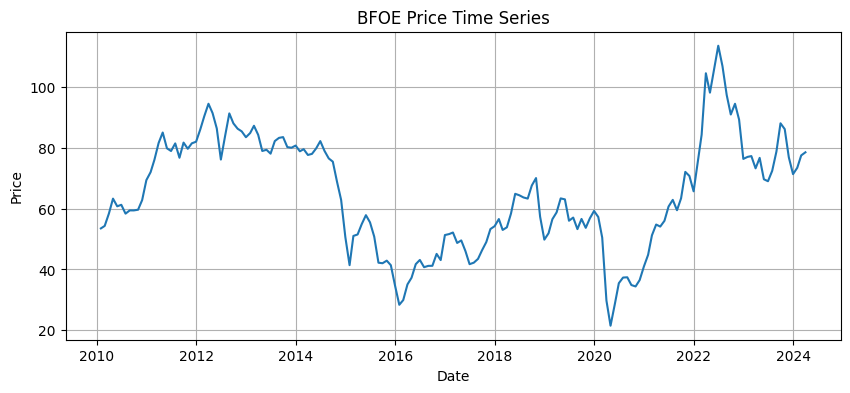

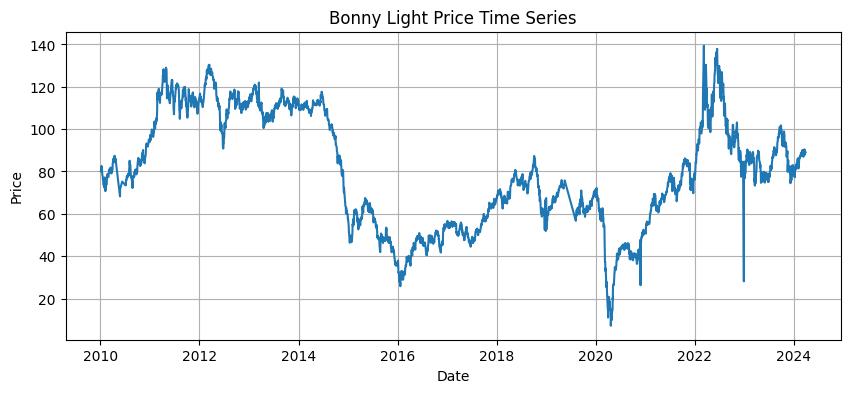

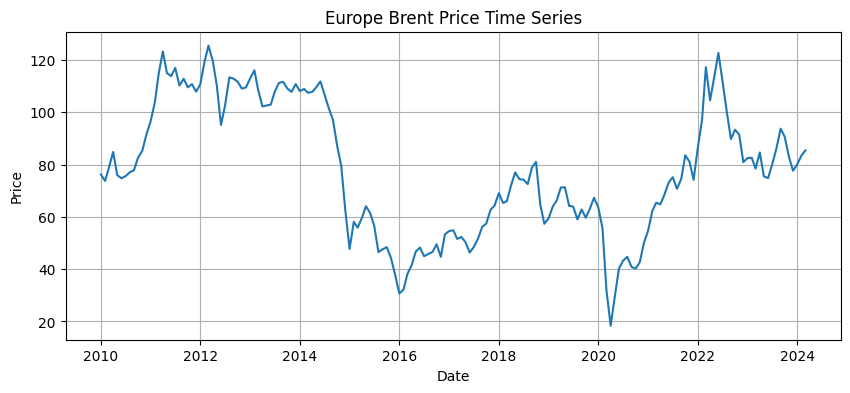

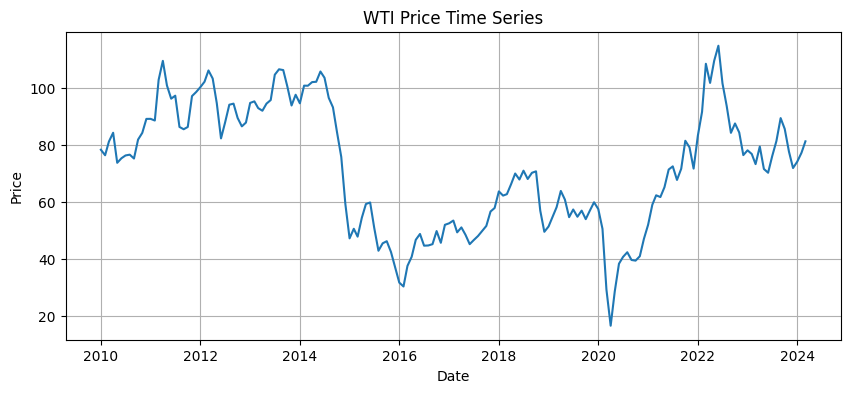

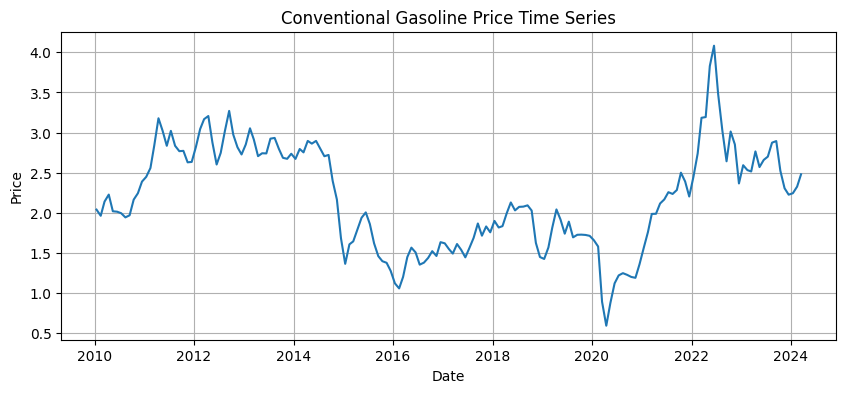

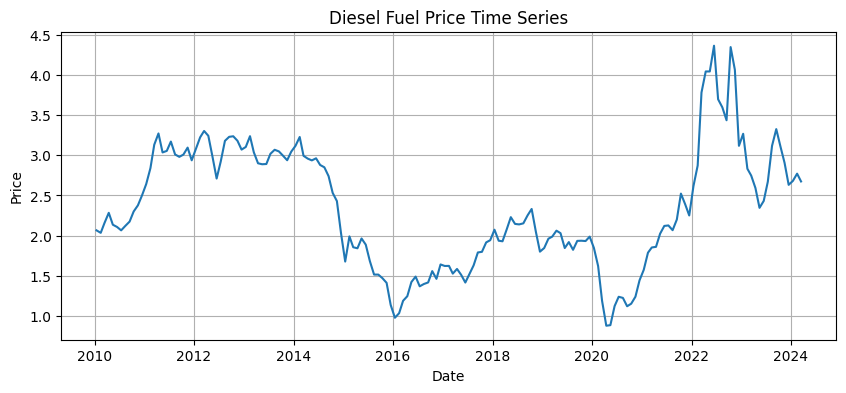

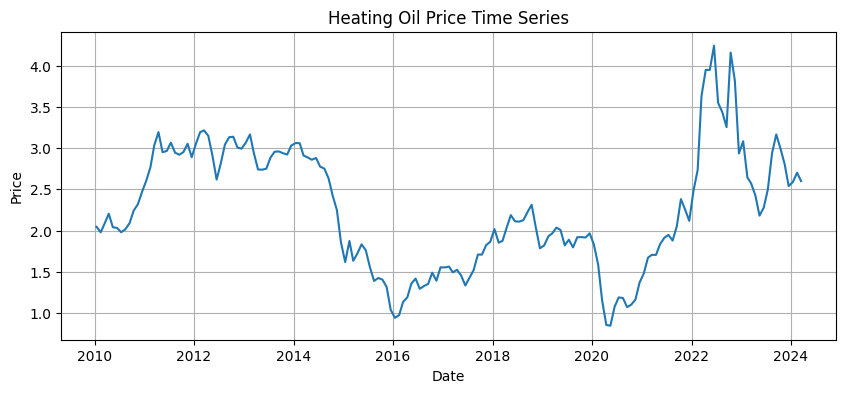

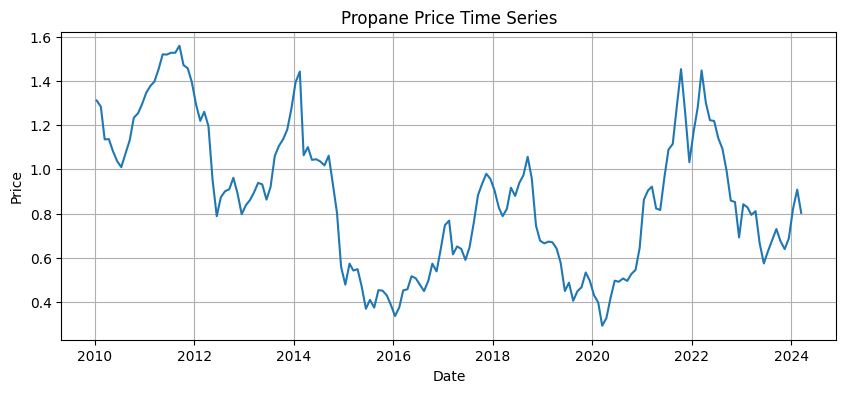

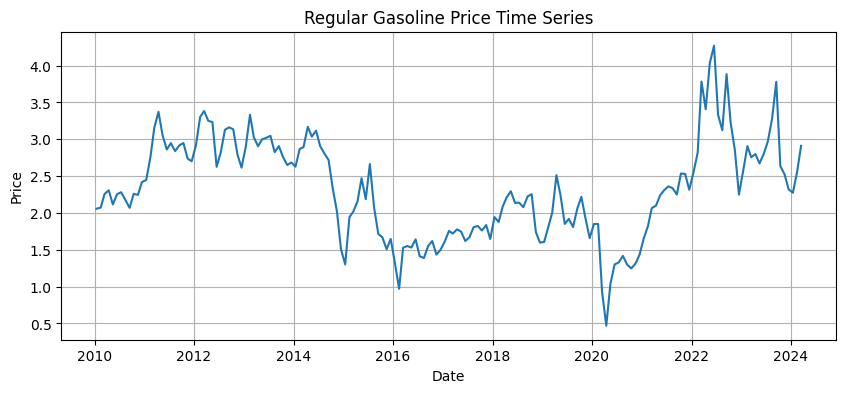

In [ ]:
def time_series_analysis(df, title):
    plt.figure(figsize=(10, 4))
    plt.plot(df)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

# Time series analysis
time_series_analysis(BFOE_df, 'BFOE Price Time Series')
time_series_analysis(Bonny_Light_df, 'Bonny Light Price Time Series')
time_series_analysis(Europe_Brent_df, 'Europe Brent Price Time Series')
time_series_analysis(WTI_df, 'WTI Price Time Series')
time_series_analysis(Conventional_Gasoline_df, 'Conventional Gasoline Price Time Series')
time_series_analysis(Diesel_Fuel_df, 'Diesel Fuel Price Time Series')
time_series_analysis(Heating_Oil_df, 'Heating Oil Price Time Series')
time_series_analysis(Propane_df, 'Propane Price Time Series')
time_series_analysis(Regular_Gasoline_df, 'Regular Gasoline Price Time Series')

#**STEP 4: Statistical Analysis**

In [ ]:
def statistical_analysis(df):
    stats = df.describe()
    correlations = df.corr()
    return stats, correlations

# Perform statistical analysis
BFOE_stats, BFOE_correlations = statistical_analysis(BFOE_df)
Bonny_Light_stats, Bonny_Light_correlations = statistical_analysis(Bonny_Light_df)
Europe_Brent_stats, Europe_Brent_correlations = statistical_analysis(Europe_Brent_df)
WTI_stats, WTI_correlations = statistical_analysis(WTI_df)
Conventional_Gasoline_stats, Conventional_Gasoline_correlations = statistical_analysis(Conventional_Gasoline_df)
Diesel_Fuel_stats, Diesel_Fuel_correlations = statistical_analysis(Diesel_Fuel_df)
Heating_Oil_stats, Heating_Oil_correlations = statistical_analysis(Heating_Oil_df)
Propane_stats, Propane_correlations = statistical_analysis(Propane_df)
Regular_Gasoline_stats, Regular_Gasoline_correlations = statistical_analysis(Regular_Gasoline_df)

# Print statistics and correlations
print('BFOE Statistics:')
print(BFOE_stats)
print('BFOE Correlations:')
print(BFOE_correlations)
print('\nBonny Light Statistics:')
print(Bonny_Light_stats)
print('Bonny Light Correlations:')
print(Bonny_Light_correlations)
print('\nEurope Brent Statistics:')
print(Europe_Brent_stats)
print('Europe Brent Correlations:')
print(Europe_Brent_correlations)
print('\nWTI Statistics:')
print(WTI_stats)
print('WTI Correlations:')
print(WTI_correlations)
print('\nConventional Gasoline Statistics:')
print(Conventional_Gasoline_stats)
print('Conventional Gasoline Correlations:')
print(Conventional_Gasoline_correlations)
print('\nDiesel Fuel Statistics:')
print(Diesel_Fuel_stats)
print('Diesel Fuel Correlations:')
print(Diesel_Fuel_correlations)
print('\nHeating Oil Statistics:')
print(Heating_Oil_stats)
print('Heating Oil Correlations:')
print(Heating_Oil_correlations)
print('\nPropane Statistics:')
print(Propane_stats)
print('Propane Correlations:')
print(Propane_correlations)
print('\nRegular Gasoline Statistics:')
print(Regular_Gasoline_stats)
print('Regular Gasoline Correlations:')
print(Regular_Gasoline_correlations)

BFOE Statistics:
       Bloomberg European Dated Brent Forties Oseberg Ekofisk (BFOE) Crude Oil Spot Price
count                                         171.000000                                 
mean                                           64.746056                                 
std                                            18.536240                                 
min                                            21.462700                                 
25%                                            51.413700                                 
50%                                            63.308600                                 
75%                                            79.494750                                 
max                                           113.656300                                 
BFOE Correlations:
                                                    Bloomberg European Dated Brent Forties Oseberg Ekofisk (BFOE) Crude Oil Spot Price
Bloomberg European 

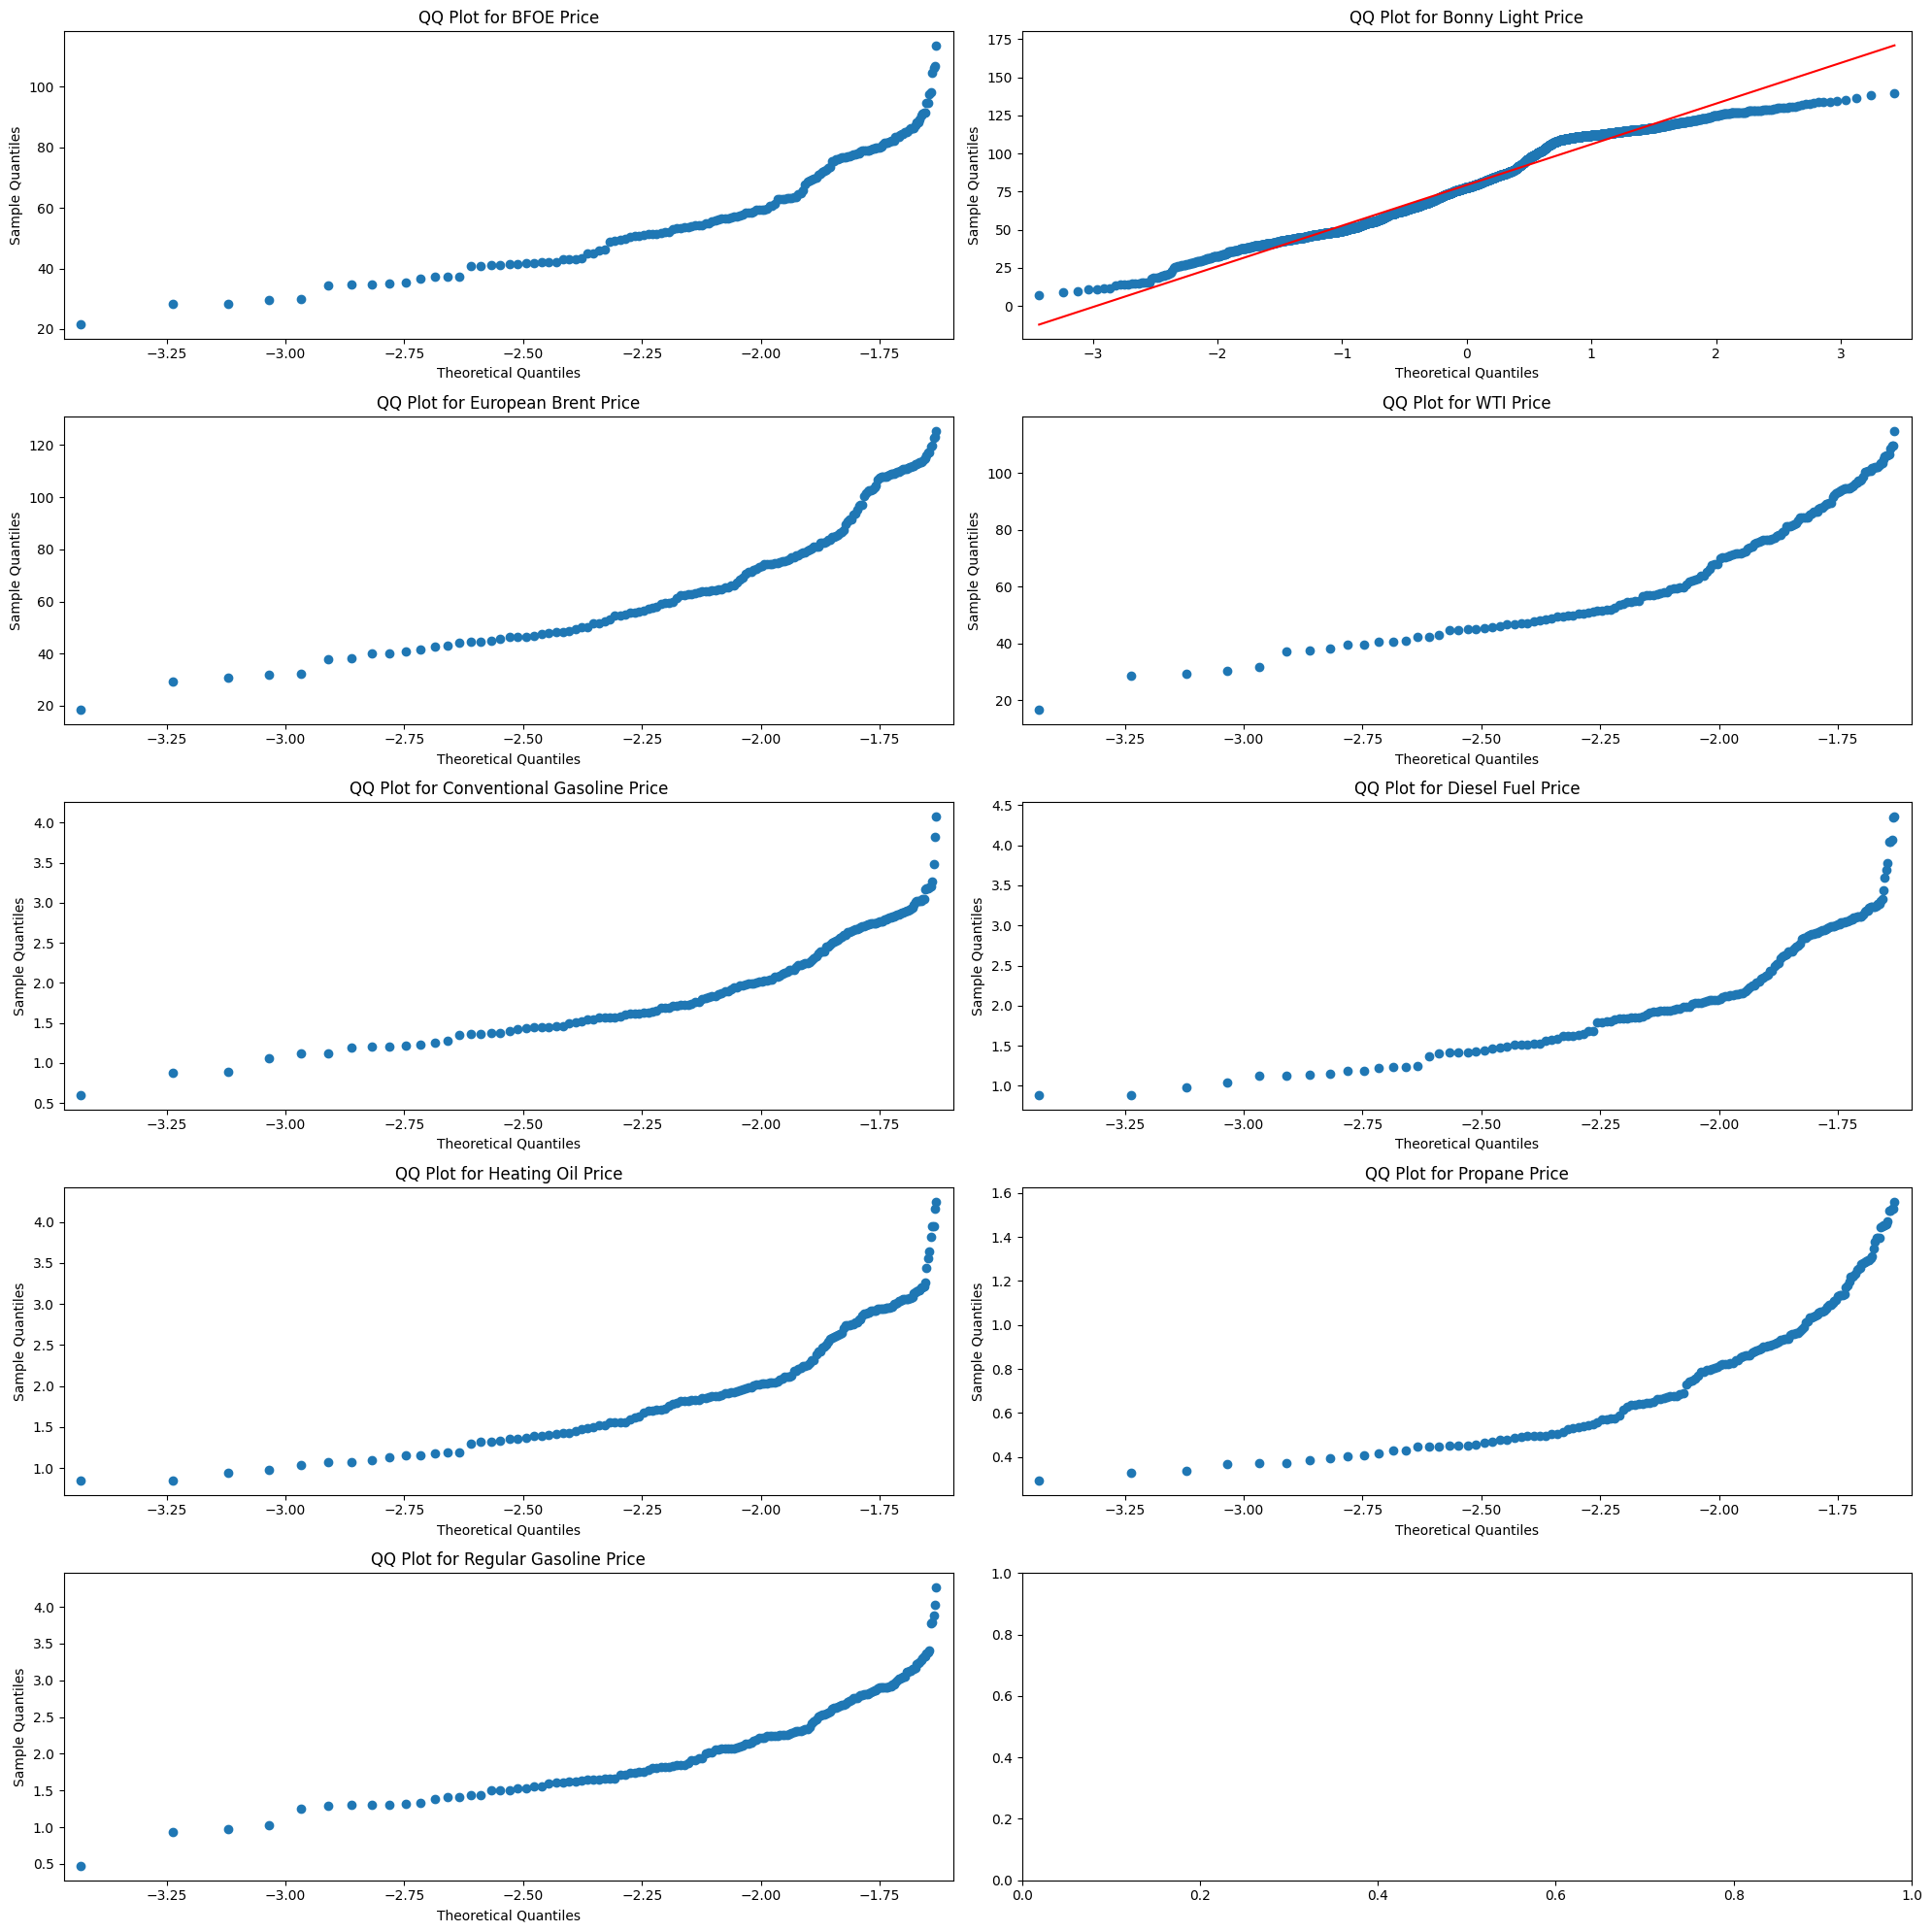

In [ ]:
# Reset index
BFOE_df.reset_index(drop=True, inplace=True)
Bonny_Light_df.reset_index(drop=True, inplace=True)
Europe_Brent_df.reset_index(drop=True, inplace=True)
WTI_df.reset_index(drop=True, inplace=True)
Conventional_Gasoline_df.reset_index(drop=True, inplace=True)
Diesel_Fuel_df.reset_index(drop=True, inplace=True)
Heating_Oil_df.reset_index(drop=True, inplace=True)
Propane_df.reset_index(drop=True, inplace=True)
Regular_Gasoline_df.reset_index(drop=True, inplace=True)

# Concatenate the preprocessed DataFrames
all_processed_data = pd.concat([BFOE_df, Bonny_Light_df, Europe_Brent_df,
                                WTI_df, Conventional_Gasoline_df,
                                Diesel_Fuel_df, Heating_Oil_df, Propane_df,
                                Regular_Gasoline_df], axis=1)

# Q-Q Analysis
price_columns = ['Bloomberg European Dated Brent Forties Oseberg Ekofisk (BFOE) Crude Oil Spot Price',
                 'Crude Oil Price in USD',
                 'Europe Brent Spot Price FOB Dollars per Barrel',
                 'Cushing OK WTI Spot Price FOB Dollars per Barrel',
                 'New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
                 'New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)',
                 'New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)',
                 'Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)',
                 'Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)']

# Subplot Titles
subplot_titles = [
    'BFOE Price', 'Bonny Light Price', 'European Brent Price', 'WTI Price',
    'Conventional Gasoline Price', 'Diesel Fuel Price', 'Heating Oil Price',
    'Propane Price', 'Regular Gasoline Price'
]

# Create subplots
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()

# Plot Q-Q plots for each price column with custom titles
for i, col in enumerate(price_columns):
    sm.qqplot(all_processed_data[col], line='s', ax=axs[i])
    axs[i].set_title('QQ Plot for {}'.format(subplot_titles[i]))

plt.tight_layout()
plt.show()

In [ ]:
# Concatenate the preprocessed DataFrames
all_processed_data = pd.concat([BFOE_df, Bonny_Light_df, Europe_Brent_df, WTI_df,
                                Conventional_Gasoline_df, Diesel_Fuel_df, Heating_Oil_df, Propane_df, Regular_Gasoline_df], axis=1)

# Extract the columns related to crude oil prices and refined products
price_columns = ['Bloomberg European Dated Brent Forties Oseberg Ekofisk (BFOE) Crude Oil Spot Price',
                 'Crude Oil Price in USD',
                 'Europe Brent Spot Price FOB Dollars per Barrel',
                 'Cushing OK WTI Spot Price FOB Dollars per Barrel']

product_columns = ['New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
                   'New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)',
                   'New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)',
                   'Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)',
                   'Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)']

# Rename columns in the correlation matrix
short_price_columns = ['BFOE', 'Crude Oil USD', 'Europe Brent', 'WTI']
short_product_columns = ['Conventional Gasoline', 'Diesel Fuel', 'Heating Oil', 'Propane', 'Regular Gasoline']

# Calculate the correlation matrix
correlation_matrix = all_processed_data[price_columns + product_columns].corr()

# Rename the columns in the correlation matrix
correlation_matrix.columns = short_price_columns + short_product_columns
correlation_matrix.index = short_price_columns + short_product_columns

# Display the correlation matrix
print("Correlation Matrix between Crude Oil Prices and Refined Products:")
print(correlation_matrix)

Correlation Matrix between Crude Oil Prices and Refined Products:
                           BFOE  Crude Oil USD  Europe Brent       WTI  \
BFOE                   1.000000       0.045275      0.129559  0.121888   
Crude Oil USD          0.045275       1.000000      0.042696  0.008363   
Europe Brent           0.129559       0.042696      1.000000  0.980445   
WTI                    0.121888       0.008363      0.980445  1.000000   
Conventional Gasoline  0.970679       0.015438      0.105360  0.093728   
Diesel Fuel            0.979099       0.058710      0.140123  0.128529   
Heating Oil            0.979561       0.035891      0.127302  0.120912   
Propane                0.676970      -0.160226      0.113263  0.093478   
Regular Gasoline       0.949062       0.080450      0.125083  0.117279   

                       Conventional Gasoline  Diesel Fuel  Heating Oil  \
BFOE                                0.970679     0.979099     0.979561   
Crude Oil USD                       0.015438 

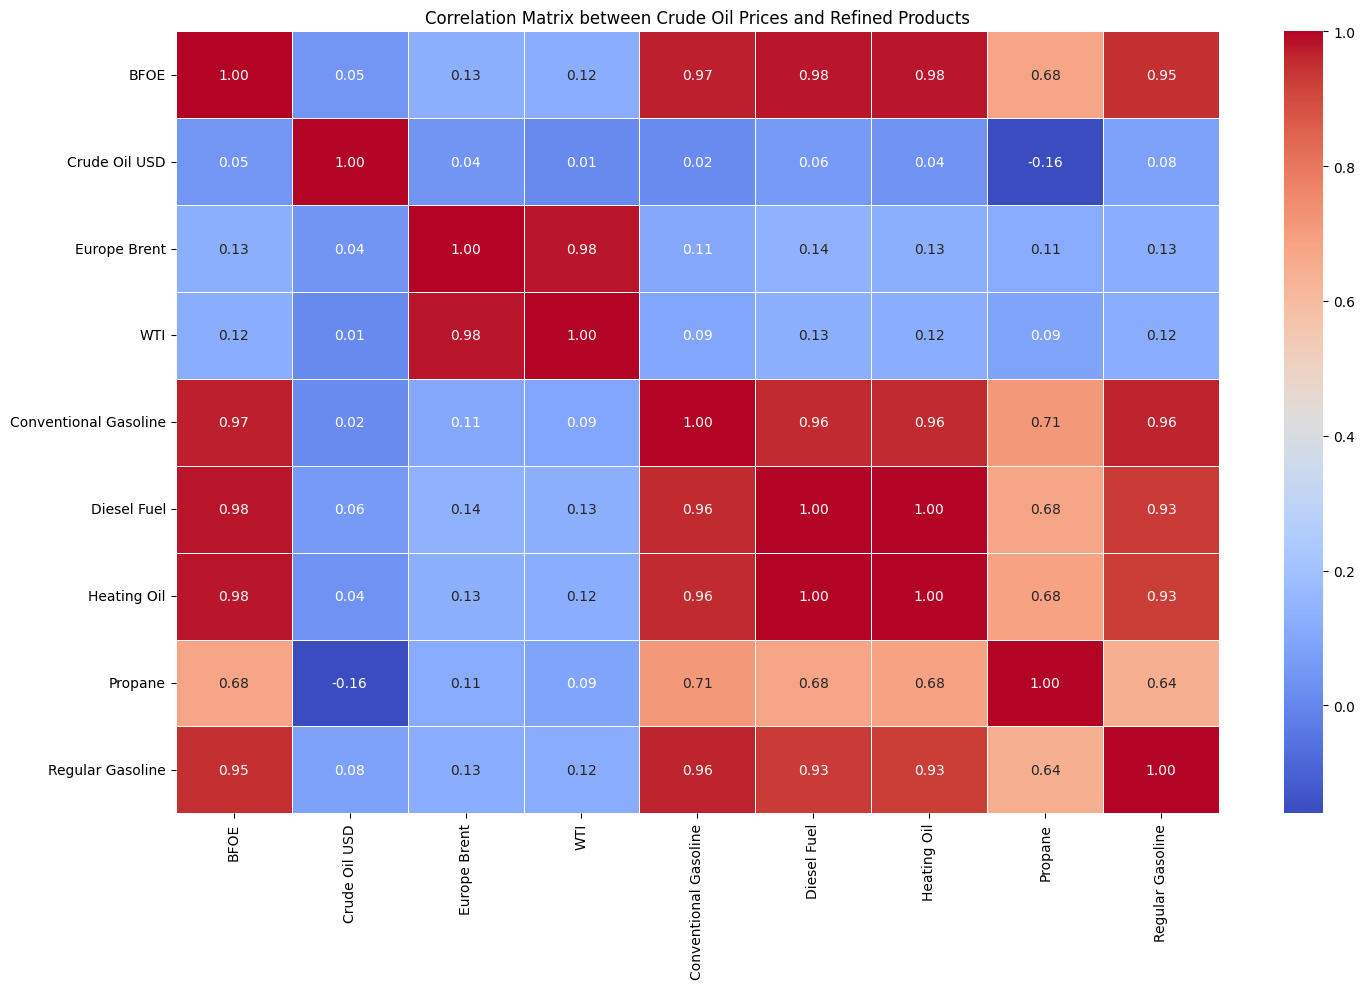

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add title and adjust plot
plt.title('Correlation Matrix between Crude Oil Prices and Refined Products')
plt.tight_layout()

# Show plot
plt.show()

#**STEP 5: Model Development via Multivariate Techniques**

## **(a) PCA Technique**

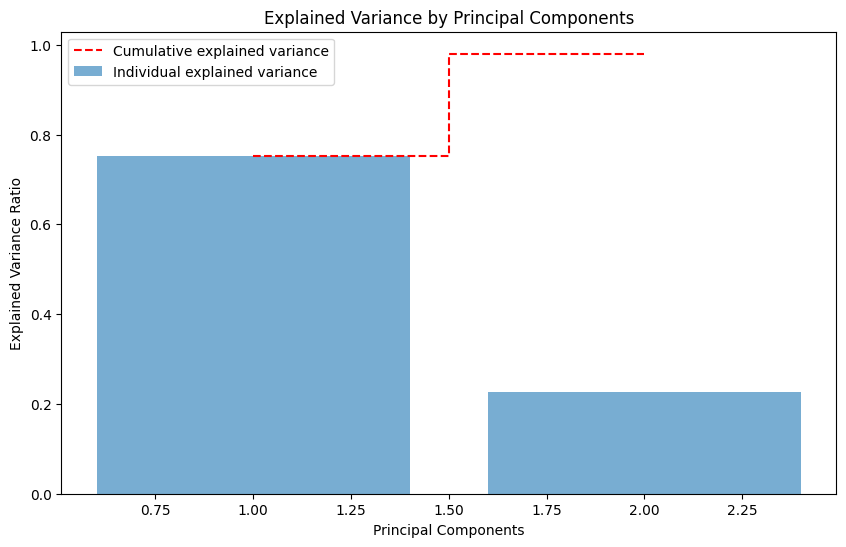

                                                         PC1       PC2
Bloomberg European Dated Brent Forties Oseberg ... -0.101125 -0.992014
Crude Oil Price in USD                             -0.004036 -0.010152
Europe Brent Spot Price FOB Dollars per Barrel     -0.754838  0.072448
Cushing OK WTI Spot Price FOB Dollars per Barrel   -0.648012  0.071340
New York Harbor Conventional Gasoline Regular S... -0.002978 -0.033531
New York Harbor Ultra-Low Sulfur No 2 Diesel Sp... -0.004276 -0.039326
New York Harbor No. 2 Heating Oil Spot Price FO... -0.003955 -0.038608
Mont Belvieu, TX Propane Spot Price FOB (Dollar... -0.001379 -0.011639
Los Angeles Reformulated RBOB Regular Gasoline ... -0.003526 -0.034209
[[-10.56360407  12.3874133 ]
 [ -6.58127057  11.14321013]
 [ -2.44967352   6.61372559]
 [  0.38359348   1.37717746]
 [ -7.11439616   4.71577472]
 [-18.10236931   5.33685437]
 [-22.61218662   8.74092807]
 [-11.7915191    6.56839101]
 [ -3.78290512   5.7594966 ]
 [  3.94547676   4.72608791]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Data Preparation
# Extract the relevant columns for PCA
crude_and_refined_data = pd.concat([all_processed_data[price_columns], all_processed_data[product_columns]], axis=1)

# Check for infinity or very large values and replace them with NaN
crude_and_refined_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Initialize SimpleImputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the data and transform it
X_imputed = imputer.fit_transform(crude_and_refined_data)

# PCA Initialization and Fitting
# Create a PCA object
pca = PCA(n_components=2)

# Fit the PCA object to the data
pca.fit(X_imputed)

# Transform the data using the PCA object
X_transformed = pca.transform(X_imputed)

# Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, 3), explained_variance_ratio, alpha=0.6, label='Individual explained variance')
plt.step(range(1, 3), cumulative_variance, where='mid', linestyle='--', color='red', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()

# Principal Component Loadings
loadings = pca.components_

# Create a DataFrame for better readability
loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(2)], index=crude_and_refined_data.columns)
print(loading_df)

# Analysis of Transformed Data
# Print the transformed data
print(X_transformed)

# Analysis
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
print("\nCumulative Variance Ratio:")
print(cumulative_variance)


 ## **(b) GARCH model**

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4817.6608354247655
Iteration:      2,   Func. Count:     11,   Neg. LLF: 949.4743102935988
Iteration:      3,   Func. Count:     15,   Neg. LLF: 949.4741543660801
Iteration:      4,   Func. Count:     19,   Neg. LLF: 949.4735383976313
Iteration:      5,   Func. Count:     23,   Neg. LLF: 949.4728742223765
Iteration:      6,   Func. Count:     26,   Neg. LLF: 949.4728742346952
Optimization terminated successfully    (Exit mode 0)
            Current function value: 949.4728742223765
            Iterations: 6
            Function evaluations: 26
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      5,   Neg. LLF: 991.6876758402238
Iteration:      2,   Func. Count:     10,   Neg. LLF: 991.6115572658858
Iteration:      3,   Func. Count:     14,   Neg. LLF: 991.6060602547101
Iteration:      4,   Func. Count:     18,   Neg. LLF: 991.6052956361332
Iteration:      5,   Func. Count:     22,   Neg. LLF: 991.6044169249418


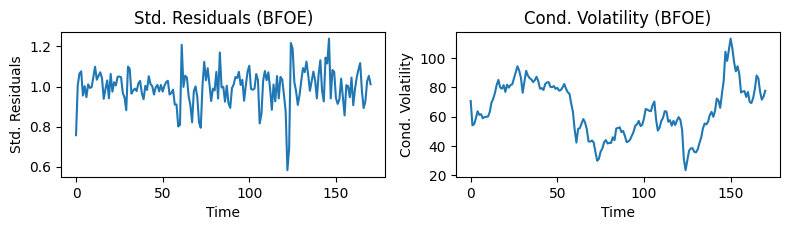

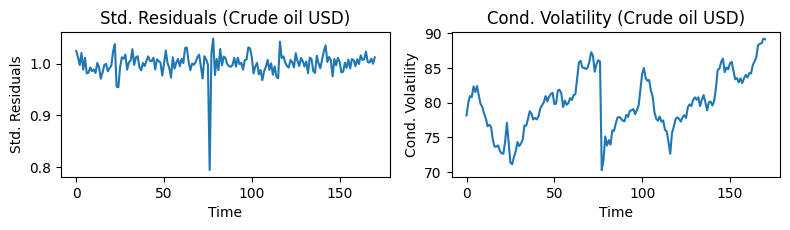

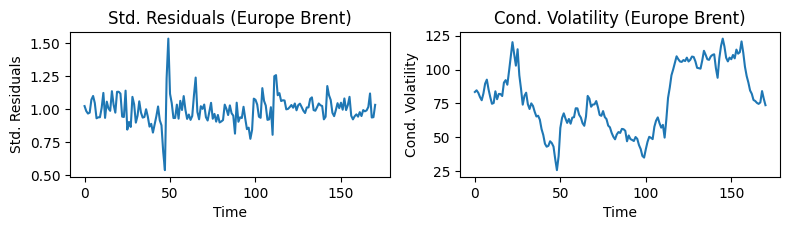

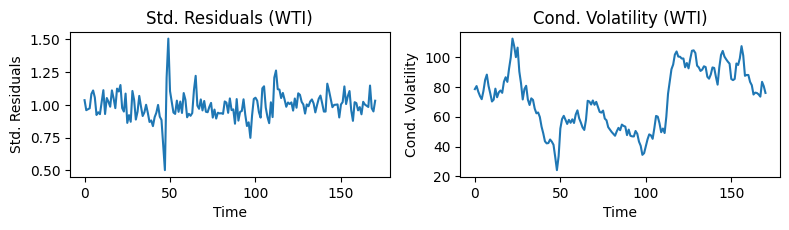

Summary for Bloomberg European Dated Brent Forties Oseberg Ekofisk (BFOE) Crude Oil Spot Price:
                                                       Zero Mean - GARCH Model Results                                                        
Dep. Variable:     Bloomberg European Dated Brent Forties Oseberg Ekofisk (BFOE) Crude Oil Spot Price   R-squared:                       0.000
Mean Model:                                                                                 Zero Mean   Adj. R-squared:                  0.006
Vol Model:                                                                                      GARCH   Log-Likelihood:               -949.473
Distribution:                                                                                  Normal   AIC:                           1904.95
Method:                                                                            Maximum Likelihood   BIC:                           1914.37
                                              

In [ ]:
# Define the oil prices for the columns
short_names = {
    'Bloomberg European Dated Brent Forties Oseberg Ekofisk (BFOE) Crude Oil Spot Price': 'BFOE',
    'Crude Oil Price in USD': 'Crude oil USD',
    'Europe Brent Spot Price FOB Dollars per Barrel': 'Europe Brent',
    'Cushing OK WTI Spot Price FOB Dollars per Barrel': 'WTI'
}

# Extract the relevant columns for GARCH modeling
oil_prices_data = all_processed_data[list(short_names.keys())]

# Drop rows with NaN values
oil_prices_data.dropna(inplace=True)

# Define a list to store the fitted models
fitted_models = []

# Fit separate GARCH models for each oil price series
for column in oil_prices_data.columns:
    oil_price_series = oil_prices_data[column]
    model = arch_model(oil_price_series, mean="Zero", vol="GARCH", p=1, q=1)
    model_fit = model.fit()
    fitted_models.append((column, model_fit))

# Plot the standardized residuals and conditional volatility with short names
for column, model_fit in fitted_models:
    # Plot the standardized residuals
    plt.figure(figsize=(8, 4))
    plt.subplot(2, 2, 1)
    plt.plot(model_fit.resid / model_fit.conditional_volatility)
    plt.title(f"Std. Residuals ({short_names[column]})")
    plt.xlabel("Time")
    plt.ylabel("Std. Residuals")

    # Plot the conditional volatility
    plt.subplot(2, 2, 2)
    plt.plot(model_fit.conditional_volatility)
    plt.title(f"Cond. Volatility ({short_names[column]})")
    plt.xlabel("Time")
    plt.ylabel("Cond. Volatility")

    plt.tight_layout()
    plt.show()

# Print summaries for each fitted model
for column, model_fit in fitted_models:
    print(f"Summary for {column}:")
    print(model_fit.summary())


Iteration:      1,   Func. Count:      5,   Neg. LLF: 86730733.11075045
Iteration:      2,   Func. Count:     11,   Neg. LLF: 369.6977479196879
Iteration:      3,   Func. Count:     15,   Neg. LLF: 369.79397752368635
Iteration:      4,   Func. Count:     20,   Neg. LLF: 369.624570386457
Iteration:      5,   Func. Count:     24,   Neg. LLF: 369.62381989815185
Iteration:      6,   Func. Count:     28,   Neg. LLF: 369.62339062599614
Iteration:      7,   Func. Count:     32,   Neg. LLF: 369.6216487797051
Iteration:      8,   Func. Count:     36,   Neg. LLF: 369.621066680024
Iteration:      9,   Func. Count:     40,   Neg. LLF: 369.620942520402
Iteration:     10,   Func. Count:     44,   Neg. LLF: 369.6209376294938
Iteration:     11,   Func. Count:     47,   Neg. LLF: 369.6209376456786
Optimization terminated successfully    (Exit mode 0)
            Current function value: 369.6209376294938
            Iterations: 11
            Function evaluations: 47
            Gradient evaluations: 11

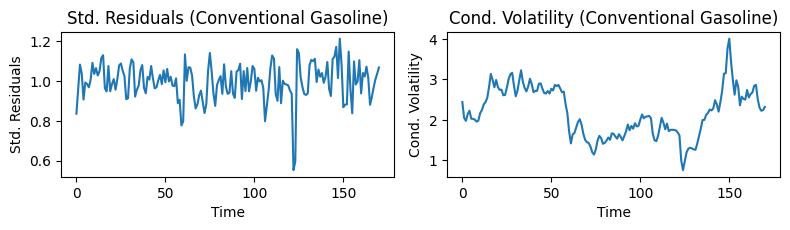

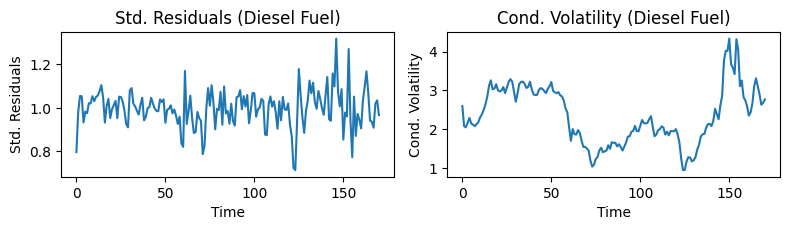

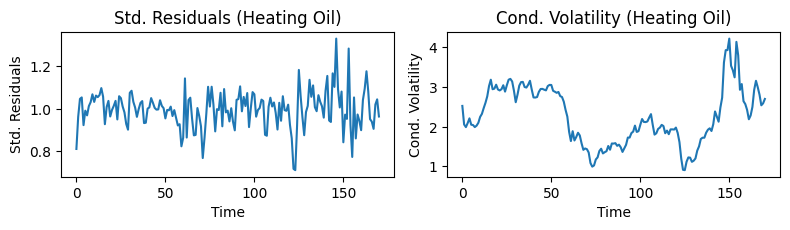

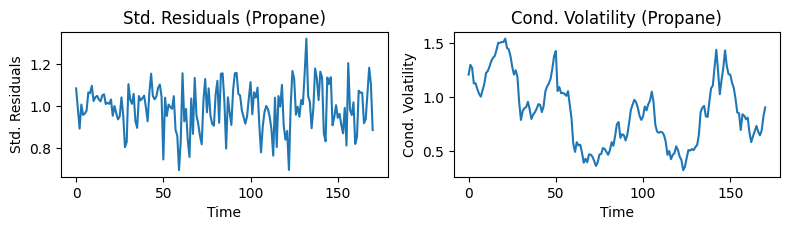

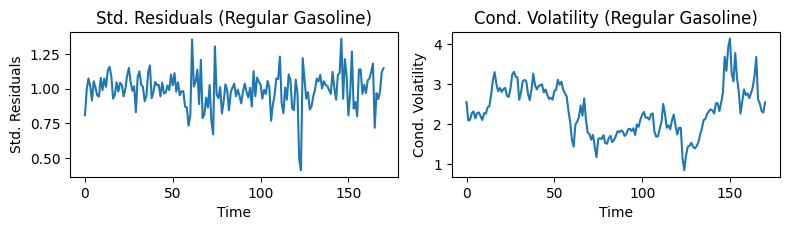

Summary for New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon):
                                                       Zero Mean - GARCH Model Results                                                       
Dep. Variable:     New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)   R-squared:                       0.000
Mean Model:                                                                                Zero Mean   Adj. R-squared:                  0.006
Vol Model:                                                                                     GARCH   Log-Likelihood:               -369.621
Distribution:                                                                                 Normal   AIC:                           745.242
Method:                                                                           Maximum Likelihood   BIC:                           754.667
                                                     

In [ ]:
# Define refined product price names for the columns
short_names = {
    'New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)': 'Conventional Gasoline',
    'New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon)': 'Diesel Fuel',
    'New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)': 'Heating Oil',
    'Mont Belvieu, TX Propane Spot Price FOB (Dollars per Gallon)': 'Propane',
    'Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)': 'Regular Gasoline'
}

# Extract the relevant columns for GARCH modeling
refined_products_data = all_processed_data[list(short_names.keys())]

# Drop rows with NaN values
refined_products_data.dropna(inplace=True)

# Define a list to store the fitted models
fitted_models = []

# Fit separate GARCH models for each refined product price series
for column in refined_products_data.columns:
    refined_product_series = refined_products_data[column]
    model = arch_model(refined_product_series, mean="Zero", vol="GARCH", p=1, q=1)
    model_fit = model.fit()
    fitted_models.append((column, model_fit))

# Plot the standardized residuals and conditional volatility with short names
for column, model_fit in fitted_models:
    # Plot the standardized residuals
    plt.figure(figsize=(8, 4))
    plt.subplot(2, 2, 1)
    plt.plot(model_fit.resid / model_fit.conditional_volatility)
    plt.title(f"Std. Residuals ({short_names[column]})")
    plt.xlabel("Time")
    plt.ylabel("Std. Residuals")

    # Plot the conditional volatility
    plt.subplot(2, 2, 2)
    plt.plot(model_fit.conditional_volatility)
    plt.title(f"Cond. Volatility ({short_names[column]})")
    plt.xlabel("Time")
    plt.ylabel("Cond. Volatility")

    plt.tight_layout()
    plt.show()

# Print summaries for each fitted model
for column, model_fit in fitted_models:
    print(f"Summary for {column}:")
    print(model_fit.summary())

## **(c) LSTM**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [ ]:
# Define a function to prepare the data for LSTM
def prepare_lstm_data(df, look_back=1):
    """
    Prepare the data for LSTM model by converting it into a supervised learning problem.
    """
    data = df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    X, y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:(i + look_back), :])
        y.append(scaled_data[i + look_back, :])
    return np.array(X), np.array(y), scaler

# Define a function to create and train the LSTM model
def train_lstm_model(X_train, y_train, units=50, epochs=1000, batch_size=64):
    """
    Create and train an LSTM model.
    """
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(y_train.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, shuffle=False)
    return model, history

# Define a function to make predictions using the trained LSTM model
def make_lstm_forecast(model, X_test, scaler, test_size):
    """
    Make predictions using the trained LSTM model.
    """
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    # Trim predictions to match the test size
    predictions = predictions[-test_size:]
    return predictions

# Define a function to evaluate the LSTM model
def evaluate_lstm_model(y_true, y_pred):
    """
    Evaluate the LSTM model using Mean Squared Error (MSE).
    """
    mse = mean_squared_error(y_true, y_pred)
    return mse

def plot_forecast(actual, predicted, dataset_names, start_date='2010-01-01', end_date='2024-12-31', title='Forecast'):
    """
    Plot the actual vs. predicted values.
    """
    # Generate a time index from start_date to end_date
    time_index = pd.date_range(start=start_date, end=end_date, freq='D')

    plt.figure(figsize=(10, 20))

    # Iterate over each dataset
    for i, col in enumerate(dataset_names):
        plt.subplot(len(dataset_names), 1, i+1)
        plt.plot(time_index[-len(predicted):], actual[:, i], label='Actual', linestyle='-')
        plt.plot(time_index[-len(predicted):], predicted[:, i], label='Predicted', linestyle='--')
        plt.title(f'{title} - {col}')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.legend()

    plt.tight_layout()
    plt.show()



Epoch 1/1000
2/2 - 3s - loss: 0.1674 - 3s/epoch - 1s/step
Epoch 2/1000
2/2 - 0s - loss: 0.1356 - 71ms/epoch - 35ms/step
Epoch 3/1000
2/2 - 0s - loss: 0.1097 - 80ms/epoch - 40ms/step
Epoch 4/1000
2/2 - 0s - loss: 0.0871 - 74ms/epoch - 37ms/step
Epoch 5/1000
2/2 - 0s - loss: 0.0674 - 70ms/epoch - 35ms/step
Epoch 6/1000
2/2 - 0s - loss: 0.0507 - 77ms/epoch - 39ms/step
Epoch 7/1000
2/2 - 0s - loss: 0.0384 - 85ms/epoch - 43ms/step
Epoch 8/1000
2/2 - 0s - loss: 0.0315 - 75ms/epoch - 38ms/step
Epoch 9/1000
2/2 - 0s - loss: 0.0295 - 74ms/epoch - 37ms/step
Epoch 10/1000
2/2 - 0s - loss: 0.0296 - 74ms/epoch - 37ms/step
Epoch 11/1000
2/2 - 0s - loss: 0.0294 - 70ms/epoch - 35ms/step
Epoch 12/1000
2/2 - 0s - loss: 0.0289 - 73ms/epoch - 37ms/step
Epoch 13/1000
2/2 - 0s - loss: 0.0285 - 76ms/epoch - 38ms/step
Epoch 14/1000
2/2 - 0s - loss: 0.0277 - 73ms/epoch - 37ms/step
Epoch 15/1000
2/2 - 0s - loss: 0.0264 - 78ms/epoch - 39ms/step
Epoch 16/1000
2/2 - 0s - loss: 0.0248 - 74ms/epoch - 37ms/step
Epoch

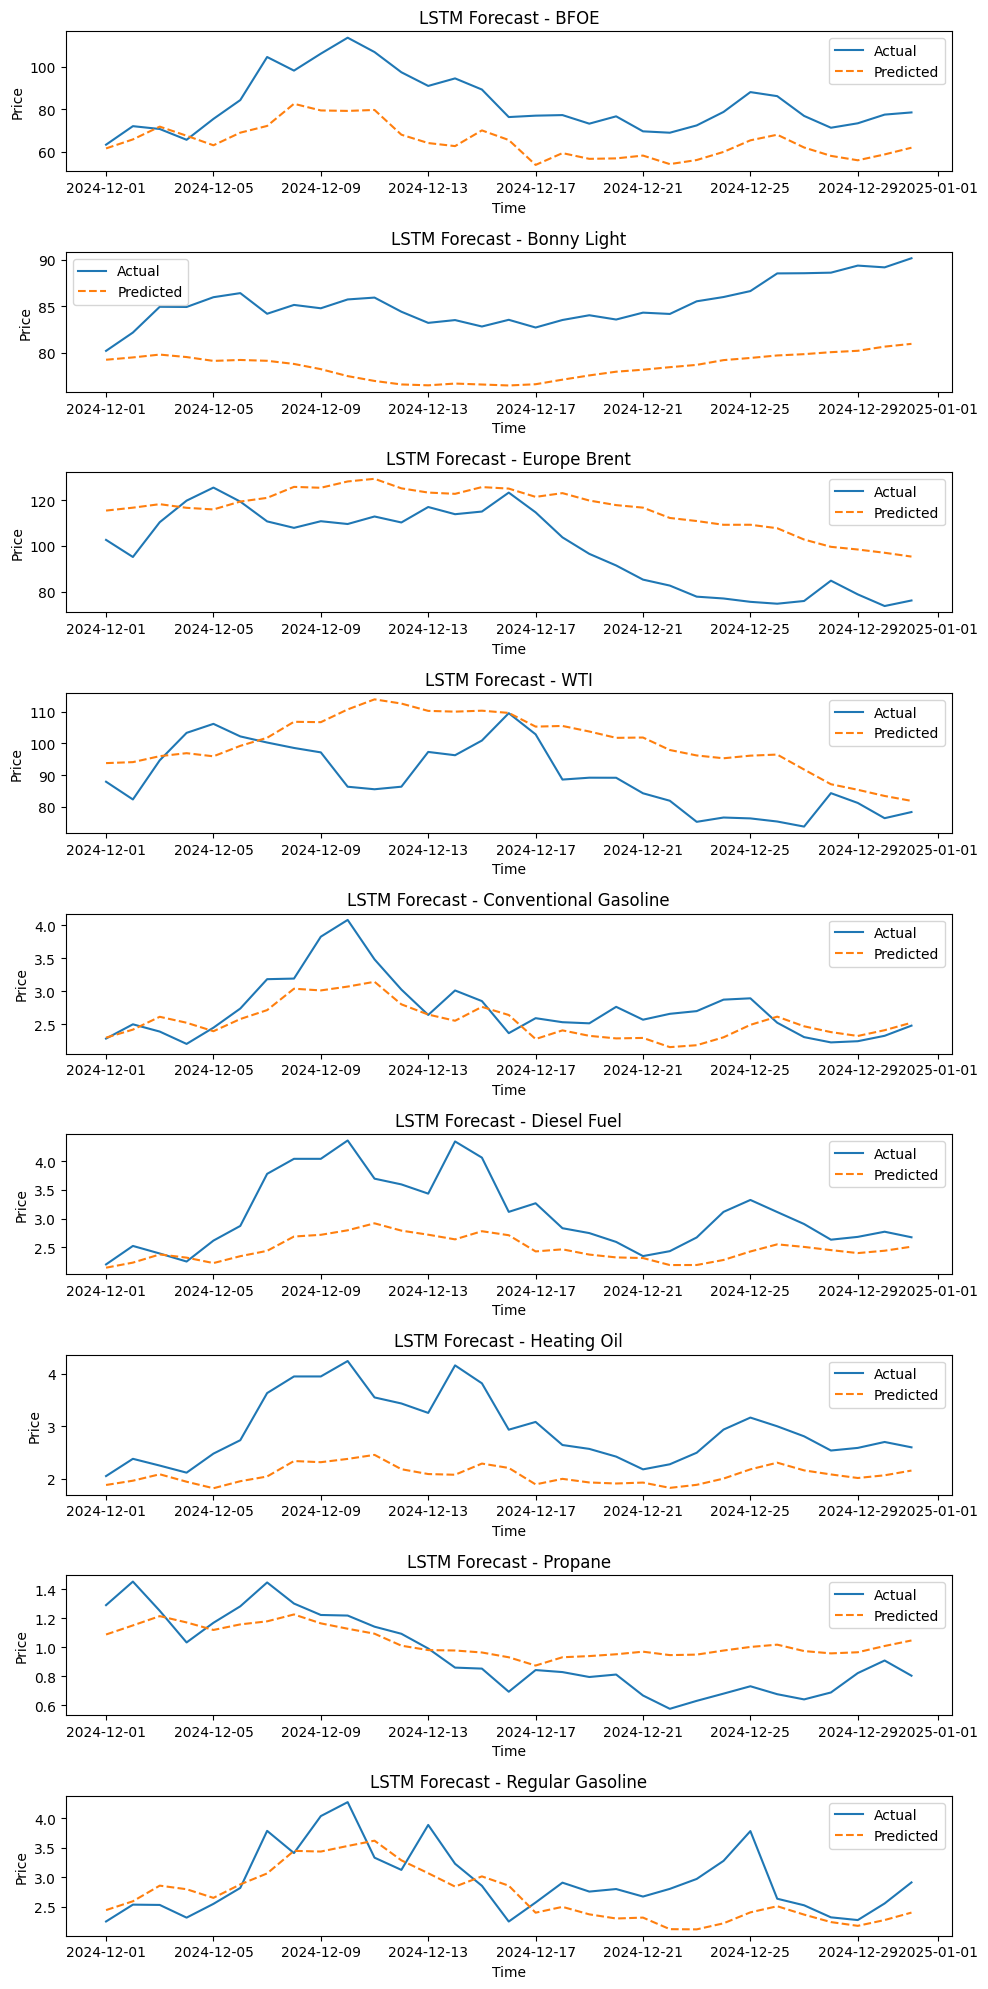

In [ ]:
# Drop rows with NaN values from crude_and_refined_data
all_processed_data.dropna(inplace=True)

# Prepare data for LSTM
look_back = 50  # Adjust as needed
X_lstm, y_lstm, scaler_lstm = prepare_lstm_data(all_processed_data, look_back)

# Split data into training and testing sets
train_size = int(len(X_lstm) * 0.75)
test_size = len(X_lstm) - train_size
X_train_lstm, X_test_lstm = X_lstm[0:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[0:train_size], y_lstm[train_size:]

# Reshape input to be [samples, time steps, features]
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2]))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], X_test_lstm.shape[2]))

# Train LSTM model
lstm_model, lstm_history = train_lstm_model(X_train_lstm, y_train_lstm)

# Make predictions using LSTM model
lstm_predictions = make_lstm_forecast(lstm_model, X_test_lstm, scaler_lstm, test_size)

# Inverse transform actual values for plotting
actual_values = scaler_lstm.inverse_transform(y_test_lstm)

# Evaluate LSTM model
mse_lstm = evaluate_lstm_model(y_test_lstm, lstm_predictions)
print("Mean Squared Error (LSTM):", mse_lstm)

dataset_names = ['BFOE', 'Bonny Light', 'Europe Brent', 'WTI', 'Conventional Gasoline',
                 'Diesel Fuel', 'Heating Oil', 'Propane', 'Regular Gasoline']

#plot_forecast(actual_values, lstm_predictions, dataset_names, title='LSTM Forecast')
plot_forecast(actual_values, lstm_predictions, dataset_names, start_date='2010-01-01', end_date='2024-12-31', title='LSTM Forecast')

